In [0]:
sample = [
    'feature engineering',
    'feature selection',
    'feature extraction'
]

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x4 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [3]:
X.toarray()

array([[1, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 1, 1, 0]], dtype=int64)

In [4]:
vec.get_feature_names()

['engineering', 'extraction', 'feature', 'selection']

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
X.toarray()

array([[0.861037  , 0.        , 0.50854232, 0.        ],
       [0.        , 0.        , 0.50854232, 0.861037  ],
       [0.        , 0.861037  , 0.50854232, 0.        ]])

In [6]:
vec.get_feature_names()

['engineering', 'extraction', 'feature', 'selection']

In [0]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/doomsheart/FaceClustering/master/doomsheart/MLforOpenCV/Chap_8_Discovering_Hidden_Structures_with_Unsupervised_Learning/Lenna.png", "Lenna.png")
img_bgr = cv.imread("Lenna.png")

In [0]:
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

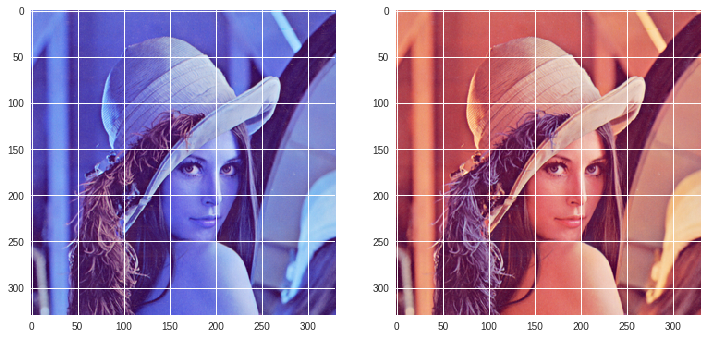

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img_bgr)
plt.subplot(122)
plt.imshow(img_rgb)

In [0]:
img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)
img_lab = cv.cvtColor(img_bgr, cv.COLOR_BGR2LAB)
img_yuv = cv.cvtColor(img_bgr, cv.COLOR_BGR2YUV)

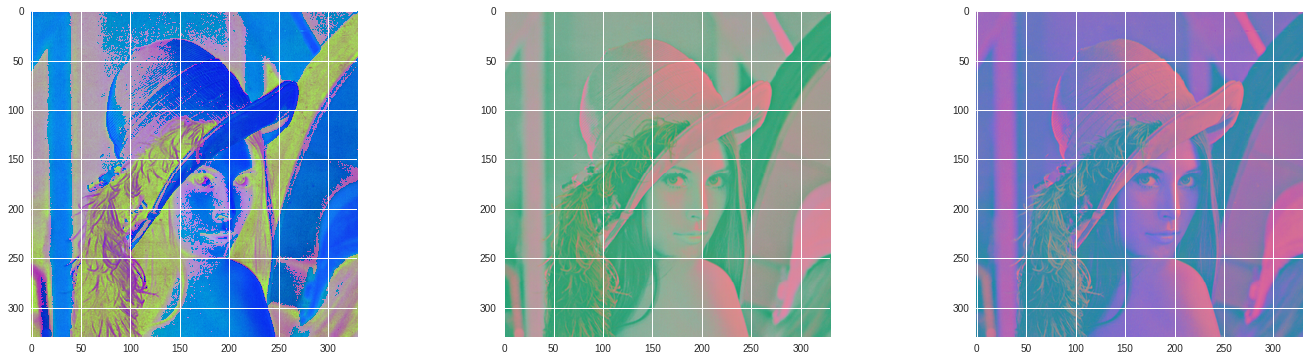

In [12]:
plt.figure(figsize=(24, 6))
plt.subplot(131)
plt.imshow(img_hsv)
plt.subplot(132)
plt.imshow(img_lab)
plt.subplot(133)
plt.imshow(img_yuv)

Harris corner detection

In [0]:
img_gray = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY)

In [0]:
corners = cv.cornerHarris(img_gray, 2, 3, 0.04)

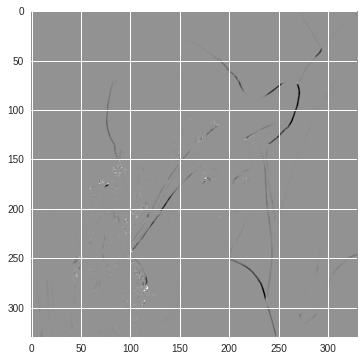

In [15]:
plt.figure(figsize=(6, 6))
plt.imshow(corners, cmap='gray')

Using the Scale-Invariant Feature Transform (SIFT)

In [16]:
!pip3 install opencv-contrib-python

In [0]:
sift = cv.xfeatures2d.SIFT_create()

In [0]:
kp = sift.detect(img_bgr)

In [0]:
import numpy as np
img_kp = np.zeros_like(img_bgr)
img_kp = cv.drawKeypoints(img_rgb, kp, img_kp,
                          flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

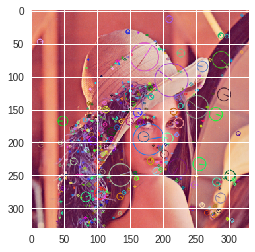

In [20]:
plt.imshow(img_kp)

In [0]:
kp, des = sift.compute(img_bgr, kp)

In [22]:
des.shape

(476, 128)

In [0]:
kp2, des2 = sift.detectAndCompute(img_bgr, None)

In [24]:
np.allclose(des, des2)

True

Speeded Up Robust Features(SURF)

In [0]:
surf = cv.xfeatures2d.SURF_create()

In [0]:
kp = surf.detect(img_bgr)

In [0]:
img_kp = cv.drawKeypoints(img_rgb, kp, img_kp,
                         flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

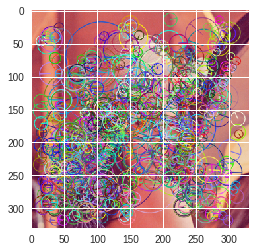

In [28]:
plt.imshow(img_kp)